In [1]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Argentina.csv")
df.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,PositionClass,Age_Ranges
0,L. Messi,31,Argentina,94,94,110500000.0,565000.0,2202,Left,5.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Attacker,31-35
1,P. Dybala,24,Argentina,89,94,89000000.0,205000.0,2092,Left,3.0,...,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M,Attacker,22-25
2,S. Agüero,30,Argentina,89,89,64500000.0,300000.0,2107,Right,4.0,...,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M,Attacker,26-30
3,G. Higuaín,30,Argentina,88,88,57000000.0,245000.0,1965,Right,4.0,...,22.0,18.0,5.0,12.0,7.0,5.0,10.0,0,Attacker,26-30
4,M. Icardi,25,Argentina,87,90,64500000.0,130000.0,1940,Right,3.0,...,24.0,20.0,13.0,9.0,5.0,7.0,9.0,€114.5M,Attacker,22-25


In [3]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPosition

In [4]:
df['Position'].value_counts()

ST     125
CB      99
GK      97
LM      64
RM      62
LB      59
CDM     55
RB      50
CAM     46
CM      46
RCB     37
LCB     35
RW      29
LW      27
LCM     25
RCM     18
LDM     16
LS      13
RDM     10
RS      10
LWB      4
LF       3
RF       2
RWB      2
CF       2
0        1
Name: Position, dtype: int64

In [5]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

26-30    287
22-25    249
16-21    197
31-35    158
36-40     45
41-45      1
Name: Age_Ranges, dtype: int64

In [6]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
L. Messi,110500000.0,565000.0
S. Agüero,64500000.0,300000.0
G. Higuaín,57000000.0,245000.0
P. Dybala,89000000.0,205000.0
N. Otamendi,28500000.0,170000.0


Text(0, 0.5, 'Wage')

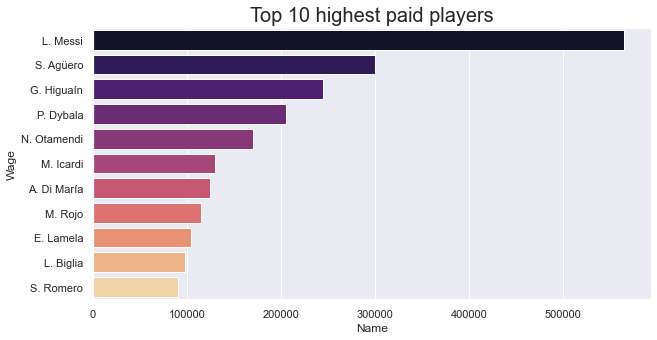

In [7]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

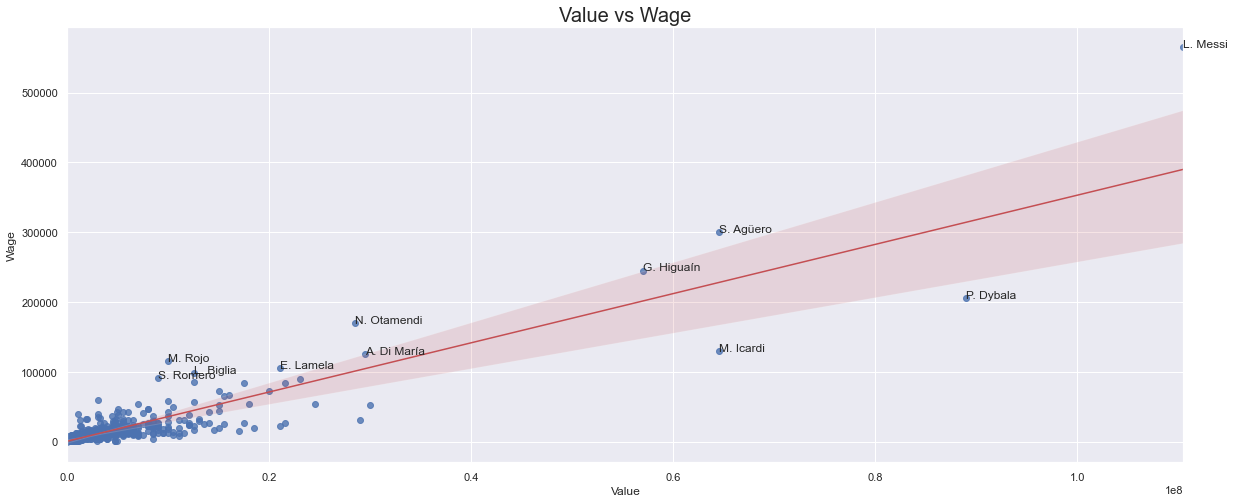

In [8]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

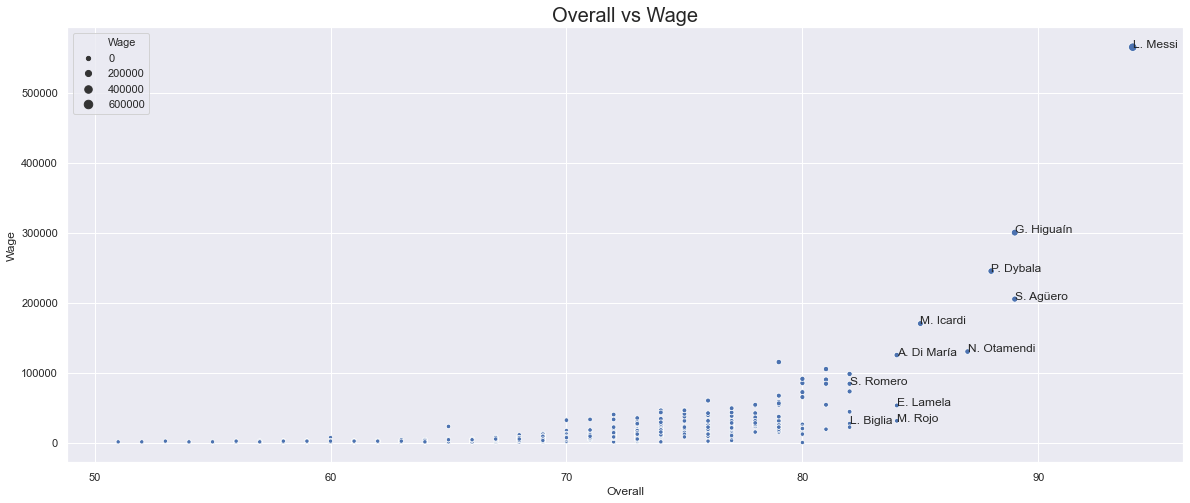

In [9]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Wage vs Position Class')

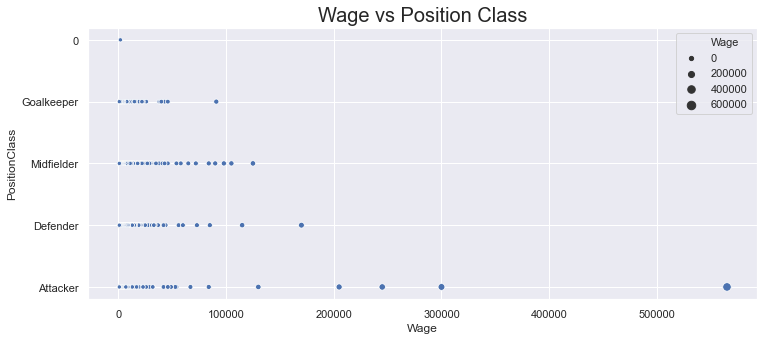

In [10]:
plt.figure(figsize=(12,5))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [11]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : M. Acuña
Best Finishing : L. Messi
Best HeadingAccuracy : M. Icardi
Best ShortPassing : L. Messi
Best Volleys : G. Higuaín
Best Skill Moves : A. Di María
Best Dribbling : L. Messi
Best Curve : L. Messi
Best FKAccuracy : L. Messi
Best LongPassing : L. Messi
Best BallControl : L. Messi
Best Agility : N. Silva
Best Acceleration : A. Gómez
Best SprintSpeed : J. Aguirre
Best Agility : N. Silva
Best Reactions : L. Messi
Best Balance : L. Messi
Best ShotPower : S. Agüero
Best Jumping : M. Icardi
Best Stamina : R. Battaglia
Best Strength : R. Civelli
Best LongShots : L. Messi
Best Reactions : L. Messi
Best Aggression : M. Rojo
Best Interceptions : F. Fazio
Best Positioning : L. Messi
Best Vision : L. Messi
Best Penalties : D. Perotti
Best Composure : L. Messi
Best Marking : F. Fazio
Best StandingTackle : N. Otamendi
Best SlidingTackle : N. Otamendi
Best GKDiving : G. Rulli
Best GKHandling : W. Benítez
Best GKKicking : P. Gazzaniga
Best GKPositioning : M. Díaz
Best GKReflexes : 